**Background**

E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.


**Introduction to Recommendation systems**


A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

**What recommeder system can solve ?**

1.  It can help the user to find the right product.
2.  It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3.  It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4.  It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

1.  Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2.  Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions


**Attribute Information:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [ ]:
!pip install "numpy<2"

In [ ]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

The Amazon product review dataset is huge, size of the dataset is 320 MB so it's recommended to download using the Kaggle repository which will be handy for further execution and will save your time and resources.

In [ ]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

In [ ]:
#load the dataframe and set column name
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [ ]:
df.shape

(7824482, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 20% of the data as sample out of the whole dataset which is 1564896.

In [ ]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [ ]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [ ]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A1CPGC3MZXIU8F,B00744T7HM,5.0,1403913600
1,A1RR647EV7BK6D,B003AU0FLQ,5.0,1353542400
2,A2CNAHBN4KRKQO,B0025VKUPW,1.0,1325116800
3,A3GA6ICQUG52FE,B00IJSAYJW,4.0,1399939200
4,A3754VOB30XNGC,B005QX7KYU,5.0,1335484800


In [ ]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [ ]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [ ]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.012702e+00
std,1.381206e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

In [ ]:
#handle missing values
electronics_data.isnull().sum()

,0
userId,0
productId,0
rating,0


In [ ]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [ ]:
electronics_data.head()

,userId,productId,rating
0,A1CPGC3MZXIU8F,B00744T7HM,5.0
1,A1RR647EV7BK6D,B003AU0FLQ,5.0
2,A2CNAHBN4KRKQO,B0025VKUPW,1.0
3,A3GA6ICQUG52FE,B00IJSAYJW,4.0
4,A3754VOB30XNGC,B005QX7KYU,5.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rating_distribution(data):
    plt.figure(figsize=(8, 4))  # Adjust figure size if needed
    sns.countplot(x='rating', data=electronics_data, palette='viridis')  # Use a vibrant color palette
    plt.title('Rating Distribution', fontsize=14)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True)
    plt.show()

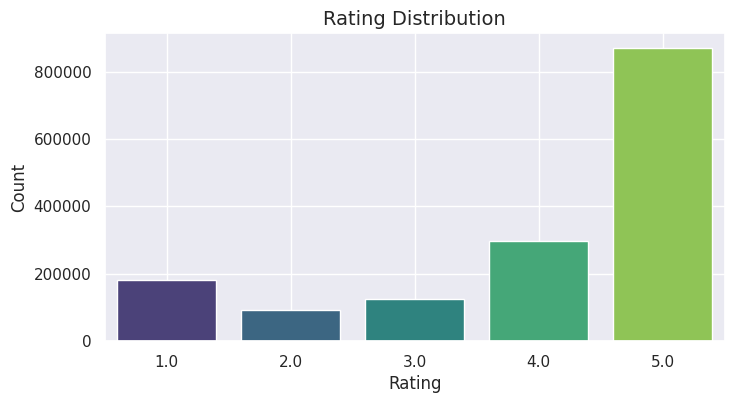

In [ ]:
plot_rating_distribution(electronics_data)

most of the user have given 5 rating

In [ ]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225904
Total unique products :  237905


analyzing the rating by user

In [ ]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

,rating
userId,
ADLVFFE4VBT8,125
A5JLAU2ARJ0BO,116
A3OXHLG6DIBRW8,93
A6FIAB28IS79,91
A1ODOGXEYECQQ8,78


In [ ]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 24 


**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [ ]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [ ]:
data.head(10)

,userId,productId,rating
2,A2CNAHBN4KRKQO,B0025VKUPW,1.0
4,A3754VOB30XNGC,B005QX7KYU,5.0
6,A2VAUN3R0OV1MB,B000LU8A7E,5.0
10,A14NATD3Z5M3C0,B000652SOK,4.0
15,AKLVJGUVQ0ZP1,B006ZS5ATM,5.0
17,A2QZBE6QLPTP6Z,B000095SB4,4.0
20,A19C6UOJRTRKLU,B00EF1OGOG,5.0
24,A3HZFOY6YU5BKD,B001XURP7W,5.0
28,A2QEDIWRXECH9L,B0087NZ31S,5.0
29,A3RFYQDNGU0JT3,B00D6XSRL2,5.0


In [ ]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [ ]:
no_of_rating_per_product.head(10)

,rating
productId,
B0074BW614,3668
B00DR0PDNE,3278
B007WTAJTO,2827
B0019EHU8G,2479
B006GWO5WK,2401
B003ELYQGG,2350
B003ES5ZUU,2035
B00622AG6S,1960
B0002L5R78,1903


In [82]:
import pandas as pd
from tabulate import tabulate
from colorama import init, Fore, Style

# Initialize colorama with settings for cross-platform compatibility
try:
    init(autoreset=True, strip=False, convert=True)
    print(Fore.RED + "Colorama test: This should be red!" + Style.RESET_ALL)
except Exception as e:
    print(f"Warning: Colorama initialization failed ({e}). Using plain output.")

# Calculate the number of ratings per product
no_of_rating_per_product = electronics_data.groupby('productId')['rating'].count().sort_values(ascending=False)

# Get top 10 products
top_10_products = no_of_rating_per_product.head(10)

# Create a DataFrame for formatted output
results_df = pd.DataFrame({
    'Rank': range(1, 11),
    'Product ID': top_10_products.index,
    'Rating Count': top_10_products.values
})

# Define headers with color if available, else plain
headers = [
    Fore.CYAN + Style.BRIGHT + 'Rank' + Style.RESET_ALL,
    Fore.CYAN + Style.BRIGHT + 'Product ID' + Style.RESET_ALL,
    Fore.CYAN + Style.BRIGHT + 'Rating Count' + Style.RESET_ALL
] if 'Fore' in globals() else ['Rank', 'Product ID', 'Rating Count']

# Print a colorful title
print(Fore.MAGENTA + Style.BRIGHT + "\n=== Top 10 Most Rated (Popular) Products ===" + Style.RESET_ALL + "\n" if 'Fore' in globals() else "\n=== Top 10 Most Rated Products ===\n")

# Create and print the table with alternating row colors
table = tabulate(
    results_df,
    headers=headers,
    tablefmt='fancy_grid',
    showindex=False,
    colalign=('center', 'center', 'center'),
    numalign='center'
)

# Apply colors if available, else print plain table
if 'Fore' in globals():
    colored_table = ""
    for i, line in enumerate(table.split('\n')):
        if i == 0 or i == 1 or i == len(table.split('\n')) - 1:
            # Header and borders in white
            colored_table += Fore.WHITE + line + Style.RESET_ALL + '\n'
        else:
            # Highlight top 3 in red, others alternate green/yellow
            rank = int(line.split('│')[1].strip()) if '│' in line else 0
            color = Fore.RED if rank <= 3 else (Fore.GREEN if i % 2 == 0 else Fore.YELLOW)
            colored_table += color + line + Style.RESET_ALL + '\n'
    print(colored_table)
else:
    print(table)

# Print a colorful closing message
print(Fore.GREEN + Style.BRIGHT + "\n Top Products Displayed Successfully! " + Style.RESET_ALL if 'Fore' in globals() else "\n=== Top Products Displayed Successfully! ===\n")

Colorama test: This should be red!

=== Top 10 Most Rated (Popular) Products ===

╒════════╤══════════════╤════════════════╕
│  Rank  │  Product ID  │  Rating Count  │
╞════════╪══════════════╪════════════════╡
│   1    │  B0074BW614  │      3668      │
├────────┼──────────────┼────────────────┤
│   2    │  B00DR0PDNE  │      3278      │
├────────┼──────────────┼────────────────┤
│   3    │  B007WTAJTO  │      2827      │
├────────┼──────────────┼────────────────┤
│   4    │  B0019EHU8G  │      2479      │
├────────┼──────────────┼────────────────┤
│   5    │  B006GWO5WK  │      2401      │
├────────┼──────────────┼────────────────┤
│   6    │  B003ELYQGG  │      2350      │
├────────┼──────────────┼────────────────┤
│   7    │  B003ES5ZUU  │      2035      │
├────────┼──────────────┼────────────────┤
│   8    │  B00622AG6S  │      1960      │
├────────┼──────────────┼────────────────┤
│   9    │  B0002L5R78  │      1903      │
├────────┼──────────────┼────────────────┤
│   10   │  B00

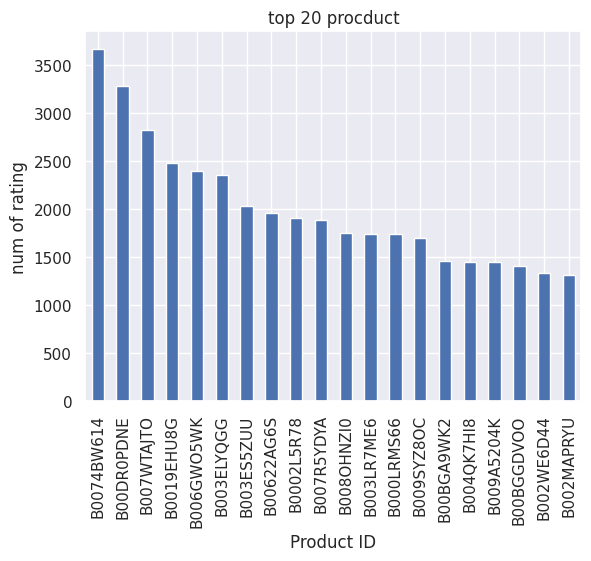

In [ ]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

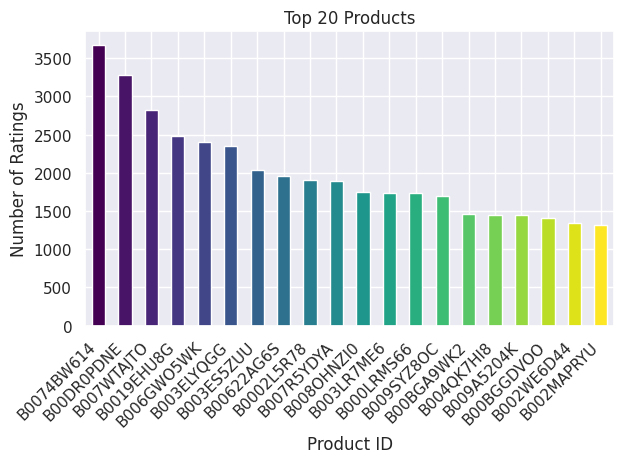

In [ ]:
# Top 20 products
no_of_rating_per_product.head(20).plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, 20)))  # Colorful bars
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')
plt.title('Top 20 Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [ ]:
mean_rating_product_count.head(10)

,rating
productId,
0972683275,4.420091
1400532655,3.592233
140053271X,3.903226
B00000DM9W,4.590909
B00000J061,4.104478
B00000J1V5,4.621212
B00000JDF5,4.620000
B00000JI4F,3.618421
B00000K135,4.416667


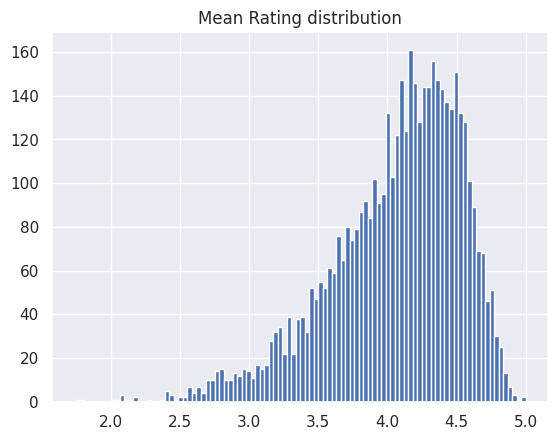

In [ ]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [ ]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9227585379644315

In [ ]:
#it is highly negative skewed

In [ ]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [ ]:
mean_rating_product_count.head(10)

,rating,rating_counts
productId,,
0972683275,4.420091,219
1400532655,3.592233,103
140053271X,3.903226,93
B00000DM9W,4.590909,66
B00000J061,4.104478,67
B00000J1V5,4.621212,66
B00000JDF5,4.620000,50
B00000JI4F,3.618421,76
B00000K135,4.416667,60


In [ ]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.487459,3668


In [ ]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  111


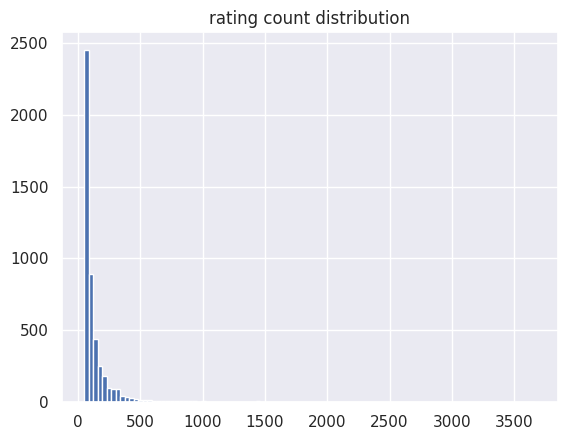

In [ ]:

#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

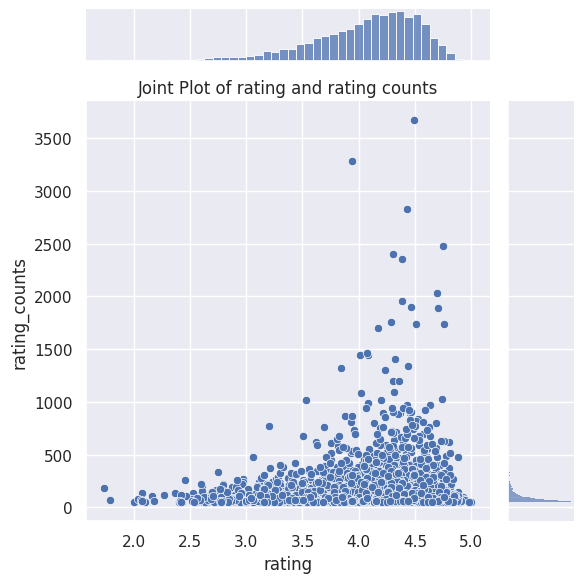

In [ ]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

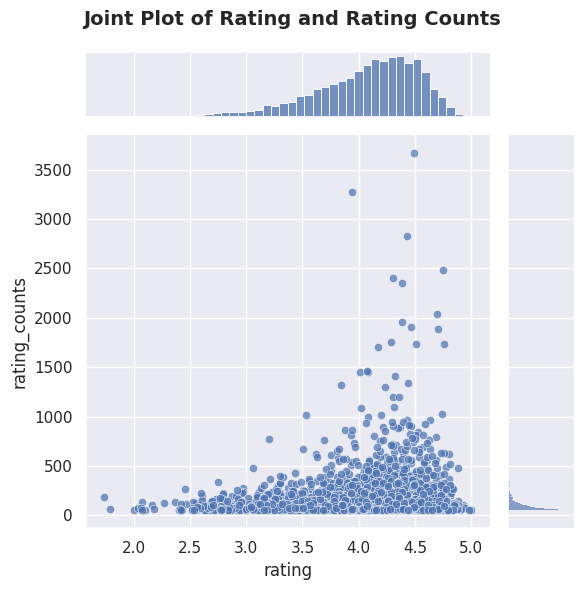

In [ ]:
# Joint plot of rating and rating counts
g = sns.jointplot(x='rating', y='rating_counts', data=mean_rating_product_count, kind='scatter', cmap='viridis', alpha=0.7)
g.fig.suptitle('Joint Plot of Rating and Rating Counts', fontsize=14, fontweight='bold')  # Add title using suptitle
g.fig.subplots_adjust(top=0.9)  # Adjust title position if needed
plt.tight_layout()
plt.show()

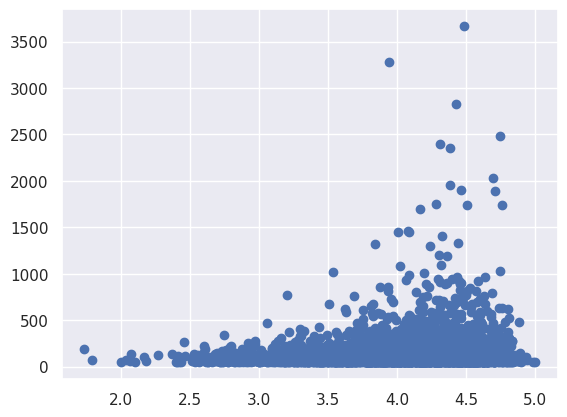

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.10789374079250058 


Colorama test: This should be red!

=== Correlation Analysis ===

Correlation between Rating and Rating Counts: 0.1079

 Insight: Weak correlation detected! 


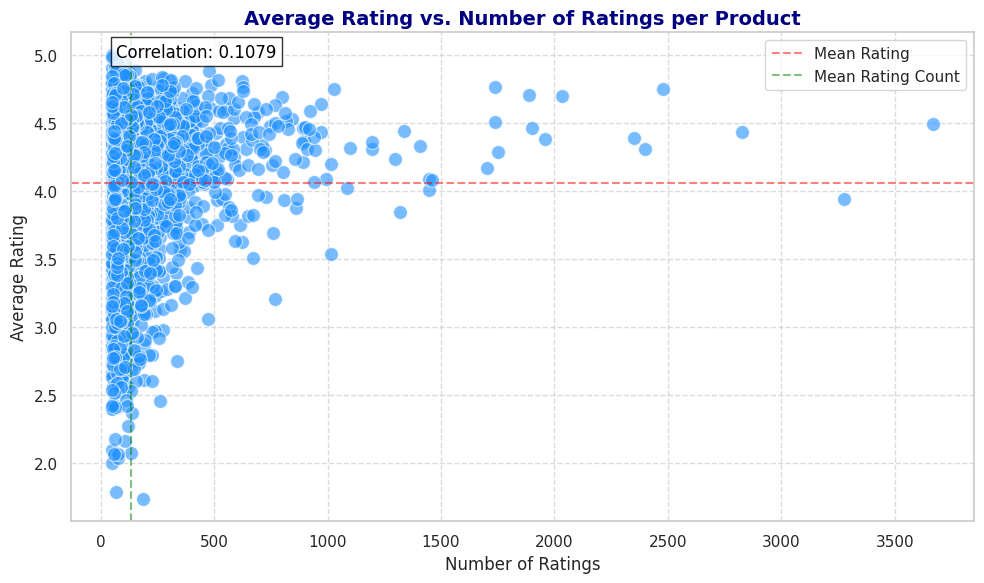

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import init, Fore, Style

# Initialize colorama for colored console output
try:
    init(autoreset=True, strip=False, convert=True)
    print(Fore.RED + "Colorama test: This should be red!" + Style.RESET_ALL)
except Exception as e:
    print(f"Warning: Colorama initialization failed ({e}). Using plain output.")

# Calculate the correlation
correlation = mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])

# Print correlation in a colorful, catchy format
print(Fore.MAGENTA + Style.BRIGHT + "\n=== Correlation Analysis ===" + Style.RESET_ALL + "\n" if 'Fore' in globals() else "\n=== Correlation Analysis ===\n")
print(Fore.CYAN + Style.BRIGHT + f"Correlation between Rating and Rating Counts: {correlation:.4f}" + Style.RESET_ALL + "\n" if 'Fore' in globals() else f"Correlation between Rating and Rating Counts: {correlation:.4f}\n")
print(Fore.GREEN + Style.BRIGHT + " Insight: " + ("Weak" if abs(correlation) < 0.3 else "Moderate" if abs(correlation) < 0.7 else "Strong") + " correlation detected! " + Style.RESET_ALL if 'Fore' in globals() else "Insight: " + ("Weak" if abs(correlation) < 0.3 else "Moderate" if abs(correlation) < 0.7 else "Strong") + " correlation detected!\n")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='rating_counts',
    y='rating',
    data=mean_rating_product_count,
    color='dodgerblue',
    alpha=0.6,
    s=100
)

# Customize the plot
plt.title('Average Rating vs. Number of Ratings per Product', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=mean_rating_product_count['rating'].mean(), color='red', linestyle='--', alpha=0.5, label='Mean Rating')
plt.axvline(x=mean_rating_product_count['rating_counts'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean Rating Count')
plt.legend()

# Add correlation annotation on the plot
plt.text(
    0.05, 0.95,
    f'Correlation: {correlation:.4f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    color='black',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

# Adjust layout and display
plt.tight_layout()
plt.show()

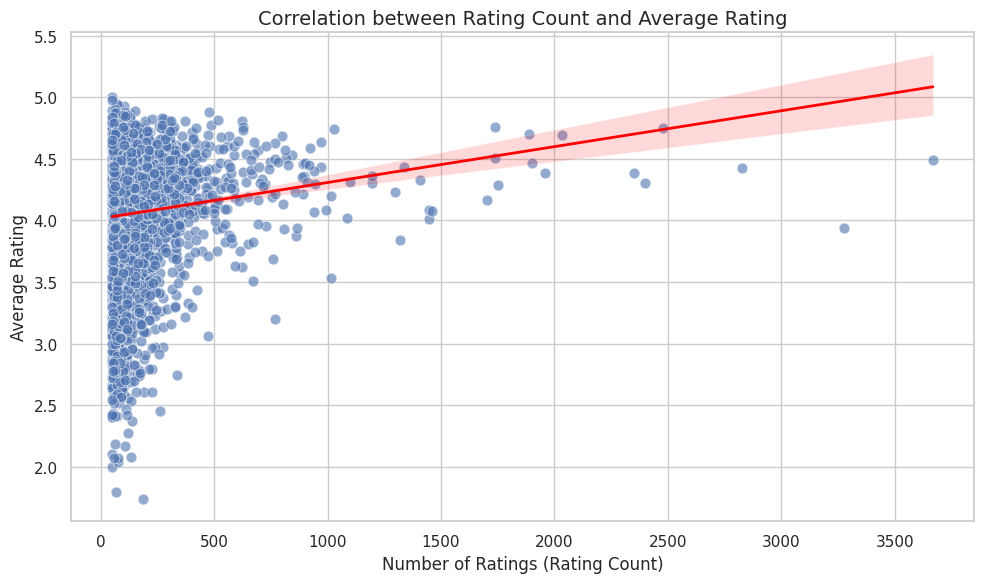

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_rating_product_count,
                x='rating_counts',
                y='rating',
                alpha=0.6,
                edgecolor='w',
                s=60)

# Add a regression line for trend visualization
sns.regplot(data=mean_rating_product_count,
            x='rating_counts',
            y='rating',
            scatter=False,
            color='red',
            line_kws={"linewidth": 2})

# Add labels and title
plt.title("Correlation between Rating Count and Average Rating", fontsize=14)
plt.xlabel("Number of Ratings (Rating Count)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [ ]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')

surprise is already installed.


In [ ]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [ ]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#make prediction using testset
test_pred=algo.test(testset)

In [73]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

# Print MAE
mae = accuracy.mae(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3110
MAE:  1.0293


In [75]:
from tabulate import tabulate
from colorama import init, Fore, Style
import pandas as pd
from surprise import accuracy

# Initialize colorama with settings for cross-platform compatibility
try:
    init(autoreset=True, strip=False, convert=True)
    print(Fore.RED  + Style.RESET_ALL)
except Exception as e:
    print(f"Warning: Colorama initialization failed ({e}). Using plain output.")

# Calculate RMSE and MAE
rmse = accuracy.rmse(test_pred, verbose=False)  # Suppress default verbose output
mae = accuracy.mae(test_pred, verbose=False)    # Suppress default verbose output

# Prepare results for tabulated output
results = [
    {'Metric': 'RMSE', 'Value': round(rmse, 4)},
    {'Metric': 'MAE', 'Value': round(mae, 4)}
]

# Create a DataFrame for formatting
results_df = pd.DataFrame(results)

# Define headers with color if available, else plain
headers = [
    Fore.CYAN + Style.BRIGHT + 'Metric' + Style.RESET_ALL,
    Fore.CYAN + Style.BRIGHT + 'Value' + Style.RESET_ALL
] if 'Fore' in globals() else ['Metric', 'Value']

# Print a colorful title
print(Fore.MAGENTA + Style.BRIGHT + "\n=== Item-Based Model Performance Metrics ===" + Style.RESET_ALL + "\n" if 'Fore' in globals() else "\n=== Item-Based Model Performance Metrics ===\n")

# Create and print the table with alternating row colors
table = tabulate(
    results_df,
    headers=headers,
    tablefmt='fancy_grid',
    showindex=False,
    colalign=('center', 'center'),
    floatfmt='.4f'
)

# Apply colors if available, else print plain table
if 'Fore' in globals():
    colored_table = ""
    for i, line in enumerate(table.split('\n')):
        if i == 0 or i == 1 or i == len(table.split('\n')) - 1:
            # Header and borders in white
            colored_table += Fore.WHITE + line + Style.RESET_ALL + '\n'
        else:
            # Alternate row colors
            color = Fore.GREEN if i % 2 == 0 else Fore.YELLOW
            colored_table += color + line + Style.RESET_ALL + '\n'
    print(colored_table)
else:
    print(table)

# Print a colorful closing message
print(Fore.GREEN + Style.BRIGHT + "\n Metrics Computed Successfully! " + Style.RESET_ALL if 'Fore' in globals() else "\n=== Metrics Computed Successfully! ===\n")



=== Item-Based Model Performance Metrics ===

╒══════════╤═════════╕
│  Metric  │  Value  │
╞══════════╪═════════╡
│   RMSE   │ 1.3110  │
├──────────┼─────────┤
│   MAE    │ 1.0293  │
╘══════════╧═════════╛


 Metrics Computed Successfully! 


**Model-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [ ]:
data2=data.sample(50000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,B00000K2YR,...,B00HVLUR86,B00HWSXVDG,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IF70QCW,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A00181602D9AWTFS65LFO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00198022L5LR4HGY7K8M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00439582LP7GOSGMC3I9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A004956818MEPP53CS0Q7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0068029I0I9JDNICHD3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [ ]:
#check the shape of the rating_matrix
ratings_matrix.shape

(49344, 4741)

In [ ]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00181602D9AWTFS65LFO,A00198022L5LR4HGY7K8M,A00439582LP7GOSGMC3I9,A004956818MEPP53CS0Q7,A0068029I0I9JDNICHD3,A007093936II192M9KF38,A0098953855BDND1SN5,A0104775CQOXJTV4OH68,A01408681ZFC50SWTCBVL,A014598223M8JG8S6ZYHO,...,AZZ2HXC308RW1,AZZ3CLU44TNDF,AZZ4Q26K6X3UC,AZZ4Q6AH9VB7,AZZ4QCG4EFCUE,AZZ7Z12AAKDFE,AZZARS9F9WOR7,AZZBSF5AEHNBJ,AZZML3F0IW99N,AZZOG1AHTORRC
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DM9W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_ratings_matrix.shape

(4741, 49344)

In [ ]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4741, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4741, 4741)

In [ ]:
x_ratings_matrix.index[10]

'B00001OWYM'

In [ ]:
i="B00007KDVK"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

128


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4741,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(185, 4741)

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B000065BP9',
 'B00006BBAC',
 'B00007KDVK',
 'B00008Y1BX',
 'B0001H27PS',
 'B0001MQSB2',
 'B0002WPSCG',
 'B00078GLJY',
 'B000A2AGYS',
 'B000AJIF4E',
 'B000AO3L84',
 'B000BAX50G',
 'B000BTL0OA',
 'B000EP4TWQ',
 'B000I20AJ6',
 'B000IZDN60',
 'B000MS3VGA',
 'B000NV0SG2',
 'B000P8AUMU',
 'B000P8X65S']

In [ ]:
!pip install colorama

In [ ]:
from tabulate import tabulate
from colorama import init, Fore, Style
import pandas as pd

# Initialize colorama for colored console output (works on Windows, Linux, Mac)
init(autoreset=True)

# Get the list of recommended products with correlation > 0.75
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
top_20_recommend = recommend[:10]

# Create a DataFrame for better formatting
recommend_df = pd.DataFrame({
    'Rank': range(1, len(top_20_recommend) + 1),
    'Product ID': top_20_recommend
})

# Define headers with color
headers = [
    Fore.CYAN + Style.BRIGHT + 'Rank' + Style.RESET_ALL,
    Fore.CYAN + Style.BRIGHT + 'Product ID' + Style.RESET_ALL
]

# Print a colorful title
print(Fore.MAGENTA + Style.BRIGHT + "\n=== Top 10 Highly Correlated Product Recommendations ===" + Style.RESET_ALL)

# Print the recommendations in a formatted, colorful table
table = tabulate(
    recommend_df,
    headers=headers,
    tablefmt='fancy_grid',
    showindex=False,
    colalign=('center', 'center')
)

# Add color to table rows (alternating colors for readability)
colored_table = ""
for i, line in enumerate(table.split('\n')):
    if i == 0 or i == 1 or i == len(table.split('\n')) - 1:
        # Header and borders remain white
        colored_table += Fore.WHITE + line + Style.RESET_ALL + '\n'
    else:
        # Alternate row colors
        color = Fore.GREEN if i % 2 == 0 else Fore.YELLOW
        colored_table += color + line + Style.RESET_ALL + '\n'

print(colored_table)

# Print a closing message
print(Fore.MAGENTA + Style.BRIGHT + "=== End of Recommendations ===" + Style.RESET_ALL)


=== Top 10 Highly Correlated Product Recommendations ===
╒════════╤══════════════╕
│  Rank  │  Product ID  │
╞════════╪══════════════╡
│   1    │  B000065BP9  │
├────────┼──────────────┤
│   2    │  B00006BBAC  │
├────────┼──────────────┤
│   3    │  B00007KDVK  │
├────────┼──────────────┤
│   4    │  B00008Y1BX  │
├────────┼──────────────┤
│   5    │  B0001H27PS  │
├────────┼──────────────┤
│   6    │  B0001MQSB2  │
├────────┼──────────────┤
│   7    │  B0002WPSCG  │
├────────┼──────────────┤
│   8    │  B00078GLJY  │
├────────┼──────────────┤
│   9    │  B000A2AGYS  │
├────────┼──────────────┤
│   10   │  B000AJIF4E  │
╘════════╧══════════════╛

=== End of Recommendations ===


In [ ]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Load dataset (Update file path if needed)
df = electronics_data  # Ensure this file contains UserID, ProductID, and Ratings

# Define rating scale
reader = Reader(rating_scale=(1, 5))

# Load data into Surprise dataset format
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
model = SVD()
model.fit(trainset)

# Function to recommend top 20 products for a user
def recommend_products(user_id, df, model, n=10):
    # Get all unique products
    all_products = df['productId'].unique()

    # Get products already rated by the user
    rated_products = df[df['userId'] == user_id]['productId'].values

    # Find products not yet rated by the user
    products_to_predict = [prod for prod in all_products if prod not in rated_products]

    # Predict ratings for these products
    predictions = [model.predict(user_id, prod) for prod in products_to_predict]

    # Sort by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get top N recommendations
    top_products = [pred.iid for pred in predictions[:n]]

    return top_products

# Example Usage
user_id = "AUE0EEZ0DAGIO"  # Replace with an actual UserID from your dataset
recommended_products = recommend_products(user_id, df, model)
print("Recommended Products for User:", recommended_products)


Recommended Products for User: ['B008VGCT9K', 'B008CFP046', 'B006TAP096', 'B001W28L2Y', 'B000UMX7FI', 'B007JY58FM', 'B0043WJRRS', 'B0033PRWSW', 'B001MSZBNA', 'B00CG70K78']


In [ ]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from tabulate import tabulate
from colorama import init, Fore, Style

# Initialize colorama for colored console output
init(autoreset=True)

# Load dataset (Update file path if needed)
df = electronics_data  # Ensure this file contains UserID, ProductID, and Ratings

# Define rating scale
reader = Reader(rating_scale=(1, 5))

# Load data into Surprise dataset format
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
model = SVD()
model.fit(trainset)

# Function to recommend top 20 products for a user
def recommend_products(user_id, df, model, n=10):
    # Get all unique products
    all_products = df['productId'].unique()

    # Get products already rated by the user
    rated_products = df[df['userId'] == user_id]['productId'].values

    # Find products not yet rated by the user
    products_to_predict = [prod for prod in all_products if prod not in rated_products]

    # Predict ratings for these products
    predictions = [model.predict(user_id, prod) for prod in products_to_predict]

    # Sort by estimated rating and include predicted scores
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get top N recommendations with predicted ratings
    top_products = [(pred.iid, round(pred.est, 2)) for pred in predictions[:n]]

    return top_products

# Example Usage
user_id = "AUE0EEZ0DAGIO"  # Replace with an actual UserID from your dataset
recommended_products = recommend_products(user_id, df, model)

# Create a DataFrame for formatted output
recommend_df = pd.DataFrame({
    'Rank': range(1, len(recommended_products) + 1),
    'Product ID': [prod[0] for prod in recommended_products],
    'Predicted Rating': [prod[1] for prod in recommended_products]
})

# Define headers with color
headers = [
    Fore.CYAN + Style.BRIGHT + 'Rank' + Style.RESET_ALL,
    Fore.CYAN + Style.BRIGHT + 'Product ID' + Style.RESET_ALL,
    Fore.CYAN + Style.BRIGHT + 'Predicted Rating' + Style.RESET_ALL
]

# Print a colorful title
print(Fore.MAGENTA + Style.BRIGHT + f"\n=== Top 10 Product Recommendations for User {user_id} ===" + Style.RESET_ALL)

# Create and print the table with alternating row colors
table = tabulate(
    recommend_df,
    headers=headers,
    tablefmt='fancy_grid',
    showindex=False,
    colalign=('center', 'center', 'center'),
    floatfmt='.2f'
)

colored_table = ""
for i, line in enumerate(table.split('\n')):
    if i == 0 or i == 1 or i == len(table.split('\n')) - 1:
        # Header and borders in white
        colored_table += Fore.WHITE + line + Style.RESET_ALL + '\n'
    else:
        # Alternate row colors (green for top 5, then green/yellow)
        rank = int(line.split('│')[1].strip()) if '│' in line else 0
        color = Fore.RED if rank <= 5 else (Fore.GREEN if i % 2 == 0 else Fore.YELLOW)
        colored_table += color + line + Style.RESET_ALL + '\n'

print(colored_table)

# Print a closing message
print(Fore.MAGENTA + Style.BRIGHT + "=== End of Recommendations ===" + Style.RESET_ALL)


=== Top 10 Product Recommendations for User AUE0EEZ0DAGIO ===
╒════════╤══════════════╤════════════════════╕
│  Rank  │  Product ID  │  Predicted Rating  │
╞════════╪══════════════╪════════════════════╡
│   1    │  B006TAP096  │        4.90        │
├────────┼──────────────┼────────────────────┤
│   2    │  B008VGCT9K  │        4.87        │
├────────┼──────────────┼────────────────────┤
│   3    │  B008CFP046  │        4.87        │
├────────┼──────────────┼────────────────────┤
│   4    │  B00CG70K78  │        4.86        │
├────────┼──────────────┼────────────────────┤
│   5    │  B00125Y0NU  │        4.86        │
├────────┼──────────────┼────────────────────┤
│   6    │  B00CZIQXBA  │        4.86        │
├────────┼──────────────┼────────────────────┤
│   7    │  B0043WJRRS  │        4.85        │
├────────┼──────────────┼────────────────────┤
│   8    │  B001W28L2Y  │        4.85        │
├────────┼──────────────┼────────────────────┤
│   9    │  B002NEGTSI  │        4.84       

In [ ]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import RandomizedSearchCV

# Load dataset (Ensure columns: userId, productId, rating)
df = electronics_data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_factors': [50, 100],  # Number of latent factors
    'reg_all': [0.02, 0.1],  # Regularization parameter
    'n_epochs': [10, 20]  # Number of training iterations
}

# Perform RandomizedSearchCV for both RMSE and MAE
rs = RandomizedSearchCV(SVD, param_grid, n_iter=4, measures=['rmse', 'mae'], cv=2, random_state=42)
rs.fit(data)

# Print best RMSE and MAE scores
print("Best RMSE: ", rs.best_score['rmse'])
print("Best MAE: ", rs.best_score['mae'])
print("Best Parameters (RMSE): ", rs.best_params['rmse'])
print("Best Parameters (MAE): ", rs.best_params['mae'])

# Train final model using best parameters based on RMSE
best_model = SVD(n_factors=rs.best_params['rmse']['n_factors'],
                 reg_all=rs.best_params['rmse']['reg_all'],
                 n_epochs=rs.best_params['rmse']['n_epochs'])

trainset = data.build_full_trainset()
best_model.fit(trainset)

print("Model training completed with optimized hyperparameters! 🚀")


Best RMSE:  1.3284224281355885
Best MAE:  1.0508369382507867
Best Parameters (RMSE):  {'n_factors': 50, 'reg_all': 0.02, 'n_epochs': 20}
Best Parameters (MAE):  {'n_factors': 50, 'reg_all': 0.02, 'n_epochs': 20}
Model training completed with optimized hyperparameters! 🚀


In [76]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import RandomizedSearchCV
from tabulate import tabulate
from colorama import init, Fore, Style

# Initialize colorama for colored console output
init(autoreset=True)

# Load dataset (Ensure columns: userId, productId, rating)
df = electronics_data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_factors': [50, 100],  # Number of latent factors
    'reg_all': [0.02, 0.1],  # Regularization parameter
    'n_epochs': [10, 20]  # Number of training iterations
}

# Perform RandomizedSearchCV for both RMSE and MAE
print(Fore.MAGENTA + Style.BRIGHT + "\n Starting Hyperparameter Tuning for SVD Model... " + Style.RESET_ALL)
rs = RandomizedSearchCV(SVD, param_grid, n_iter=4, measures=['rmse', 'mae'], cv=2, random_state=42)
rs.fit(data)

# Prepare results for tabulated output
results = [
    {
        'Metric': 'RMSE',
        'Score': round(rs.best_score['rmse'], 4),
        'Parameters': f"n_factors={rs.best_params['rmse']['n_factors']}, "
                     f"reg_all={rs.best_params['rmse']['reg_all']}, "
                     f"n_epochs={rs.best_params['rmse']['n_epochs']}"
    },
    {
        'Metric': 'MAE',
        'Score': round(rs.best_score['mae'], 4),
        'Parameters': f"n_factors={rs.best_params['mae']['n_factors']}, "
                     f"reg_all={rs.best_params['mae']['reg_all']}, "
                     f"n_epochs={rs.best_params['mae']['n_epochs']}"
    }
]

# Create a DataFrame for formatting
results_df = pd.DataFrame(results)

# Define headers with color
headers = [
    Fore.CYAN + Style.BRIGHT + 'Metric' + Style.RESET_ALL,
    Fore.CYAN + Style.BRIGHT + 'Score' + Style.RESET_ALL,
    Fore.CYAN + Style.BRIGHT + 'Best Parameters' + Style.RESET_ALL
]

# Print a colorful title for results
print(Fore.MAGENTA + Style.BRIGHT + "\n=== Hyperparameter Tuning Results ===" + Style.RESET_ALL)

# Create and print the table with alternating row colors
table = tabulate(
    results_df,
    headers=headers,
    tablefmt='fancy_grid',
    showindex=False,
    colalign=('center', 'center', 'left'),
    floatfmt='.4f'
)

colored_table = ""
for i, line in enumerate(table.split('\n')):
    if i == 0 or i == 1 or i == len(table.split('\n')) - 1:
        # Header and borders in white
        colored_table += Fore.WHITE + line + Style.RESET_ALL + '\n'
    else:
        # Alternate row colors
        color = Fore.GREEN if i % 2 == 0 else Fore.YELLOW
        colored_table += color + line + Style.RESET_ALL + '\n'

print(colored_table)

# Train final model using best parameters based on RMSE
print(Fore.MAGENTA + Style.BRIGHT + "\n Training Final SVD Model with Best Parameters... " + Style.RESET_ALL)
best_model = SVD(n_factors=rs.best_params['rmse']['n_factors'],
                 reg_all=rs.best_params['rmse']['reg_all'],
                 n_epochs=rs.best_params['rmse']['n_epochs'])

trainset = data.build_full_trainset()
best_model.fit(trainset)

# Print a colorful completion message
print(Fore.GREEN + Style.BRIGHT + "\n Model Training Completed with Optimized Hyperparameters! " + Style.RESET_ALL)


 Starting Hyperparameter Tuning for SVD Model... 

=== Hyperparameter Tuning Results ===
╒══════════╤═════════╤═════════════════════════════════════════╕
│  Metric  │  Score  │ Best Parameters                         │
╞══════════╪═════════╪═════════════════════════════════════════╡
│   RMSE   │ 1.3286  │ n_factors=50, reg_all=0.02, n_epochs=20 │
├──────────┼─────────┼─────────────────────────────────────────┤
│   MAE    │ 1.0510  │ n_factors=50, reg_all=0.02, n_epochs=20 │
╘══════════╧═════════╧═════════════════════════════════════════╛


 Training Final SVD Model with Best Parameters... 

 Model Training Completed with Optimized Hyperparameters! 


In [ ]:
import pickle

with open("Pranay_recommendation_model.pkl", "wb") as f:
    pickle.dump(model, f)
